<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/NEIL1_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
#helper utilities for model training and interpretation 
import sys 
sys.path.append('../xgboost_with_shap/')

from helpers import * 
import numpy as np

from plotnine import * 
import pandas as pd 


In [3]:
data=pd.read_csv("../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',')

In [4]:
data.head()

,rna_id,editing_value,minimum_free_energy,ensemble_free_energy,mfe_frequency,ensemble_diversity,sim_nor_score,probability_active_conf,num_mutations,mut_exist,...,d3_length_stem,d3_length_hairpin,d3_length_bulge,d3_length_internal_es,d3_length_internal_ecs,d3_5prm_cp_hairpin,d3_5prm_cp_bulge,d3_3prm_cp_bulge,d3_5prm_cp_internal,d3_3prm_cp_internal
0,1,0.58,-40.1,-41.29,0.143877,29.39,0.7426,0.137610,1,1,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.46,-38.5,-39.30,0.274518,10.93,0.9125,0.131799,1,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.49,-39.1,-40.32,0.138271,28.24,0.9301,0.065449,1,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.48,-44.1,-44.78,0.331605,4.19,1.0000,0.321958,1,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.59,-40.8,-41.45,0.346702,8.25,0.7400,0.169233,1,1,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]

In [6]:
data['editing_value']=(data['editing_value']-0.64)/np.std(data['editing_value']-0.64)

In [7]:
data=format_for_xgboost(data)

../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a co

(434, 203)


../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"


In [8]:
data.head()

,rna_id,editing_value,minimum_free_energy,ensemble_free_energy,mfe_frequency,ensemble_diversity,sim_nor_score,probability_active_conf,num_mutations,mut_exist,...,d3_length_stem,d3_length_hairpin,d3_length_bulge,d3_length_internal_es,d3_length_internal_ecs,d3_5prm_cp_hairpin,d3_5prm_cp_bulge,d3_3prm_cp_bulge,d3_5prm_cp_internal,d3_3prm_cp_internal
0,1,-0.248570,-40.1,-41.29,0.143877,29.39,0.7426,0.137610,1,1,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,-0.745710,-38.5,-39.30,0.274518,10.93,0.9125,0.131799,1,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,-0.621425,-39.1,-40.32,0.138271,28.24,0.9301,0.065449,1,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,-0.662853,-44.1,-44.78,0.331605,4.19,1.0000,0.321958,1,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,-0.207142,-40.8,-41.45,0.346702,8.25,0.7400,0.169233,1,1,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
feat_to_plot=open("neil1_top_feat.txt",'r').read().strip().split('\n')

In [10]:
data=data[['editing_value']+feat_to_plot]

In [16]:
high_levels=data[data['editing_value']>=1]
low_levels=data[data['editing_value']<= -2]
remaining_levels=data[(data['editing_value']>-2) & (data['editing_value']<1)]

In [17]:
high_levels.shape

(1, 21)

In [18]:
m_high_levels=pd.melt(high_levels)
m_high_levels['Group']='High'
m_low_levels=pd.melt(low_levels)
m_low_levels['Group']='Low'
m_remaining=pd.melt(remaining_levels)
m_remaining['Group']="Other"
all_df=pd.concat((m_high_levels,m_low_levels,m_remaining),axis=0)

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 185 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


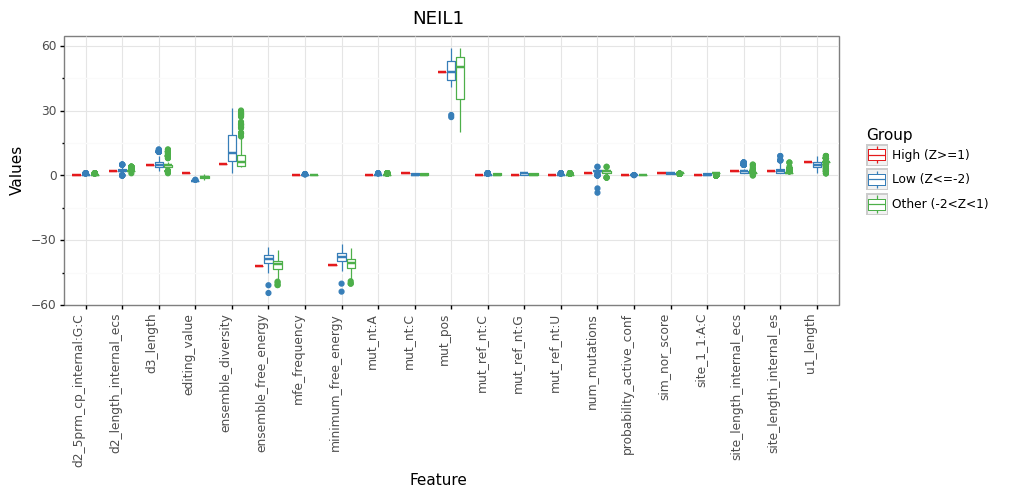

<ggplot: (8752877671101)>


/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: NEIL1.editing.outlier.features.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 185 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


In [24]:
import plotnine
plotnine.options.figure_size = (10, 3.5)

p=(ggplot(all_df, aes('variable', 'value',color='Group'))
 + geom_boxplot()
 + ggtitle("NEIL1")
 + xlab("Feature")
 + ylab("Values")
 + scale_color_manual(values=['#e41a1c','#377eb8','#4daf4a'],labels=["High (Z>=1)","Low (Z<=-2)","Other (-2<Z<1)"])
 + theme_bw()
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))
print(p)
ggsave(plot=p, filename='NEIL1.editing.outlier.features.svg',width=10,height=3.5,units='in')
